In [17]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [18]:
with open('Data/cp-cal_data.txt','r') as tf:
    data = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 616800

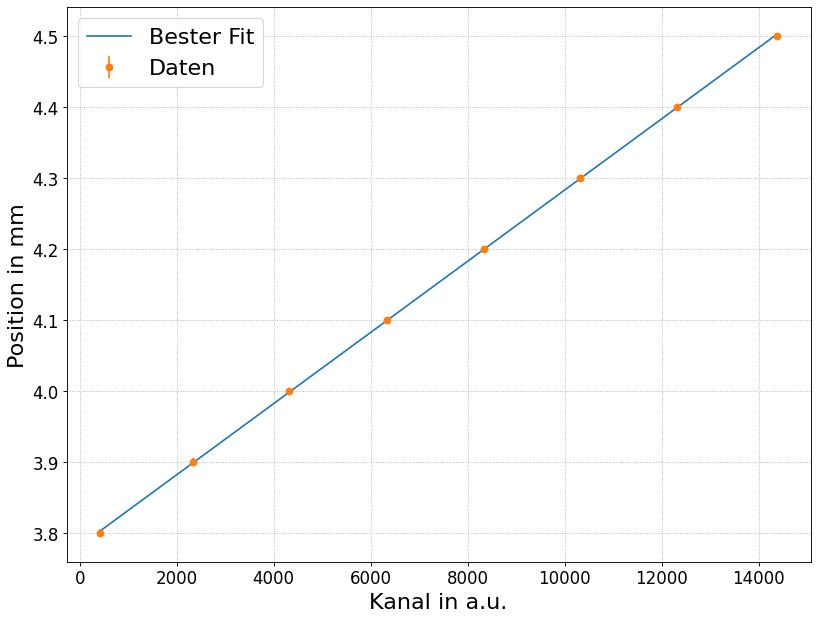

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 8
    # variables        = 2
    chi-square         = 0.97202020
    reduced chi-square = 0.16200337
    Akaike info crit   = -12.8625619
    Bayesian info crit = -12.7036788
    R-squared          = -1.31433381
[[Variables]]
    slope:      5.0151e-05 +/- 1.5574e-07 (0.31%) (init = 5.015114e-05)
    intercept:  3.78171508 +/- 0.00134694 (0.04%) (init = 3.781715)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8491


In [19]:
f.figsize(1)

res = f.linfit(data[1],data[0],np.full(len(data[1]),0.005))
plt.plot(data[0],res.eval(x=data[0]),label='Bester Fit')
plt.errorbar(data[0],data[1],np.full(len(data[1]),0.005),fmt='o',label='Daten')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form(xlabel='Kanal in a.u.',ylabel='Position in mm',name='Res/A6_cpcal.pdf')
print(res.fit_report())

In [20]:
with open('Res/cp-cal_res.txt','w')as tf:
    tf.write(str(res.params['slope'].value)+'\t'+str(res.params['slope'].stderr)+'\t'+str(res.params['intercept'].value)+'\t'+str(res.params['intercept'].stderr))